# Random walk on lattice

In [5]:
import os
import random

import matplotlib.pyplot as plt

from model import Graph
from graph_generators import generate_2d_lattice

In [6]:
def get_xy_coordinates(vertices):
    
    list_of_coordinates = [list(map(int, el.id.split(','))) for el in vertices]
    x, y = list(zip(*list_of_coordinates))
    return x, y


def plot_lattice_graph(g, current_node=None, filepath=None):
    plt.figure()
    
    vertices = g.getVertices()
    x, y = get_xy_coordinates(vertices)
    plt.scatter(x, y, color = 'k')
    plt.xlim([min(x), max(x)])
    plt.ylim([min(y), max(y)])

    for u in g.getVertices():
        for v in u.getNeighbors():
            x, y = get_xy_coordinates([u, v])
            plt.plot(x, y, 'k')
            
    if current_node:
        x_current, y_current = get_xy_coordinates([current_node])
        plt.scatter(x_current, y_current, s = 150, c = 'r')
        
    plt.axis('off')
        
    if filepath:
        plt.savefig(filepath)

In [7]:
def simulate_random_walk(g, starting_node='0,0', steps=20):
    if not os.path.exists('tmp'):
        os.makedirs('tmp')
    
    current_node = g.getVertex(starting_node)

    for i in range(steps):
        current_node = random.choices(current_node.getNeighbors())[0]
        filepath = os.path.join('tmp', f'{i}.png')
        plot_lattice_graph(g, current_node, filepath=filepath)


In [8]:
n, m = 4, 5 # Lattice size
g = generate_2d_lattice(n, m)

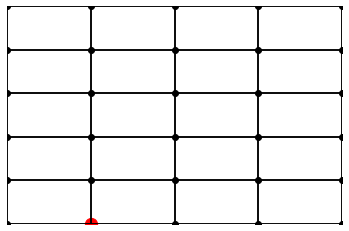

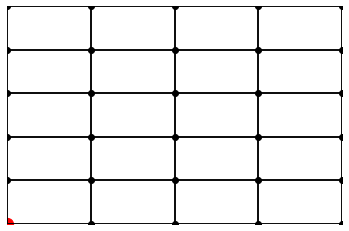

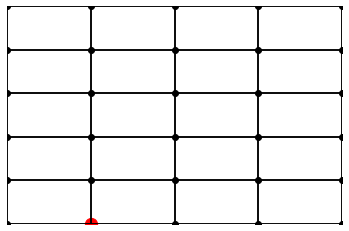

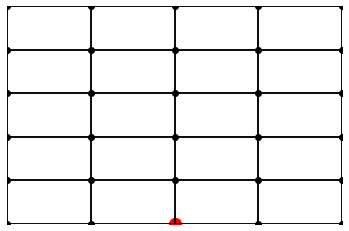

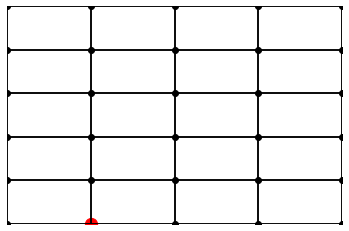

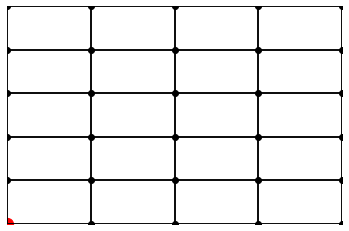

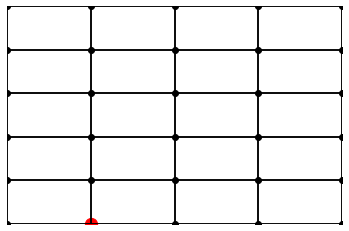

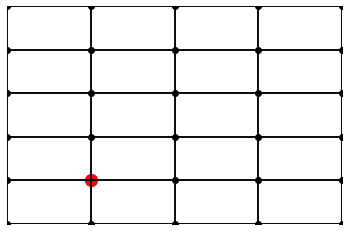

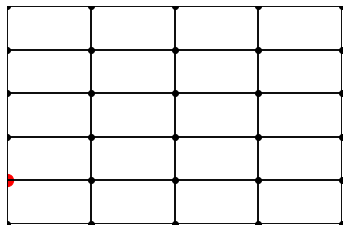

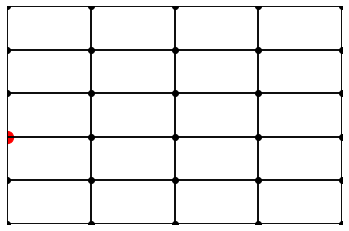

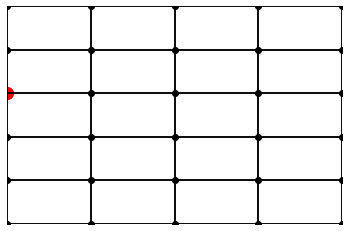

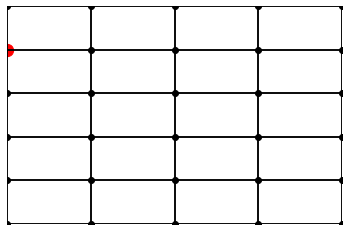

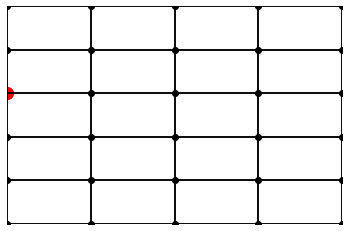

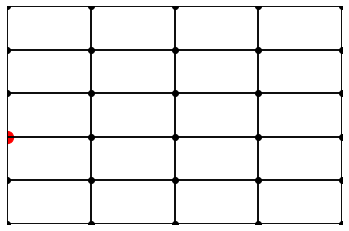

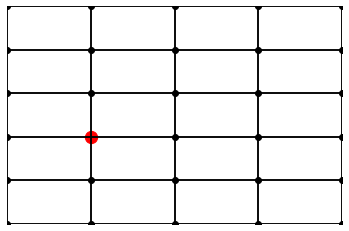

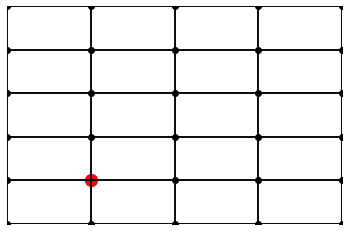

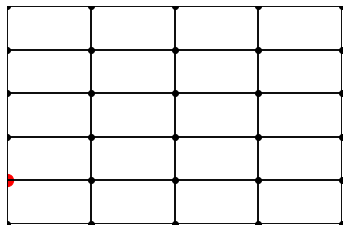

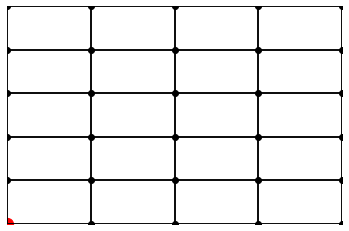

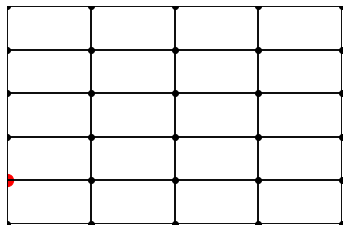

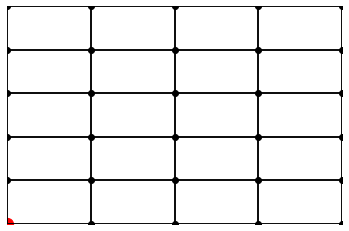

In [9]:
simulate_random_walk(g)

In [101]:
# Create animation
!convert -delay 20 -loop 0 `ls -v tmp/*.png` outputs/animation.gif 
!rm -rf tmp/